## Assignment 7: Exploring the General Social Survey--Write up

**Name: Zunda Xu (zunda@uchicago.edu)**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
gss_2012 = pd.read_csv("gss2012.csv")

**Background Introduction**

The General Social Survey (GSS) gathers data on contemporary American society and it contains a standard core of demographic, behavioral and attitudinal questions, plus topics of special interest. Among the topics covered are civil liberties, morality, psychological well-being, social mobility and so on. Altogether the GSS is one of the best source for sociological and attitudinal trend covering the United States, and it allows researchers to examine the structure and functioning of society in general as well as the role played by relevant subgroups. In this assignment, the GSS dataset we used is collected in 2012, which includes respondents' basic demographic characteristics(such as gender, race, region, working status, education level and etc.), answers to behavioral question (such as the extent of happiness, voting choice in 2008 president election and etc.) and attitudinal question like the priorities of national spending, the key factors to get ahead and so on. Therefore, we can take advantage of this dataset to do some exploration surrounding the respondents' **income**.

**Research Questions**

Since the key word we want to do investigation on is income, some interesting questions could be addressed by researchers through this dataset. Knowing that 2012 GSS data contains not only those respondents' basic demographic characteristics, but also their response to some behavioral and attitudinal questions, we determine that the research questions in this assignment mainly consist of two parts: 

(1) Compare the difference in respondents' total family income accross their demographic characteristics (such as gender, race, degree and etc.)

(2) Explore the relationship between respondents'total family income and their answer to specific behavioral/attitudinal questions (such as the extent of happiness, the voting choice in 2008 president election and etc.)

**Analyze the sampling of GSS data**

Before we start our exploration, we need analyze the sampling of the dataset and figure out the distributions of some specific demographic characteristics such as gender, race, degree and etc. 

As shown in the lab notebook, we first choose four basic demographic characteristics of those respondents, which is gender, race, highest degree and rigion, and we use four pie charts to show the distribution of those variables in this dataset respectively. From these pie charts, we find the female respondents account for 55.1%, while the male respondents account for the rest 44.9%. About the race, the GSS revealed an oversampling of while people, which take up around three fourths. About the respondents' highest degree, around half of the respondents only finished high school, while the respondents with higher education level(e.g. bachelor degree and graduate degree) only account for 28.3%. The last is about the region distribution, the respondents come from 9 regions, and the top 3 regions that respondents come from are South Atlantic, East North Central and Pacific.

To some extent, knowing the sampling distribution is really important for us to analysis the variation or difference between variables.

**Compare the difference in total family income across gender and race**

Now we could start our exploration about income. There are two related variables in this dataset, "income06" stands for the total family income of each respondent, and "rinco06" represents the individual income of each respondents. Since compared with total family income, there are more missing value (e.g. NA) existed in individual income, therefore, we will choose "income06" and analyze the difference in this variable.

As shown in the lab notebook, we first use bar graphs to show the overall distribution of "income06" and the distribution of this variable by working status. Through the graph below, we find in general, respondents who have full-time job are representing much more significantly than people with other working status in almost every income level, thus, we determined to only explore the income difference of people who work full time in this study.

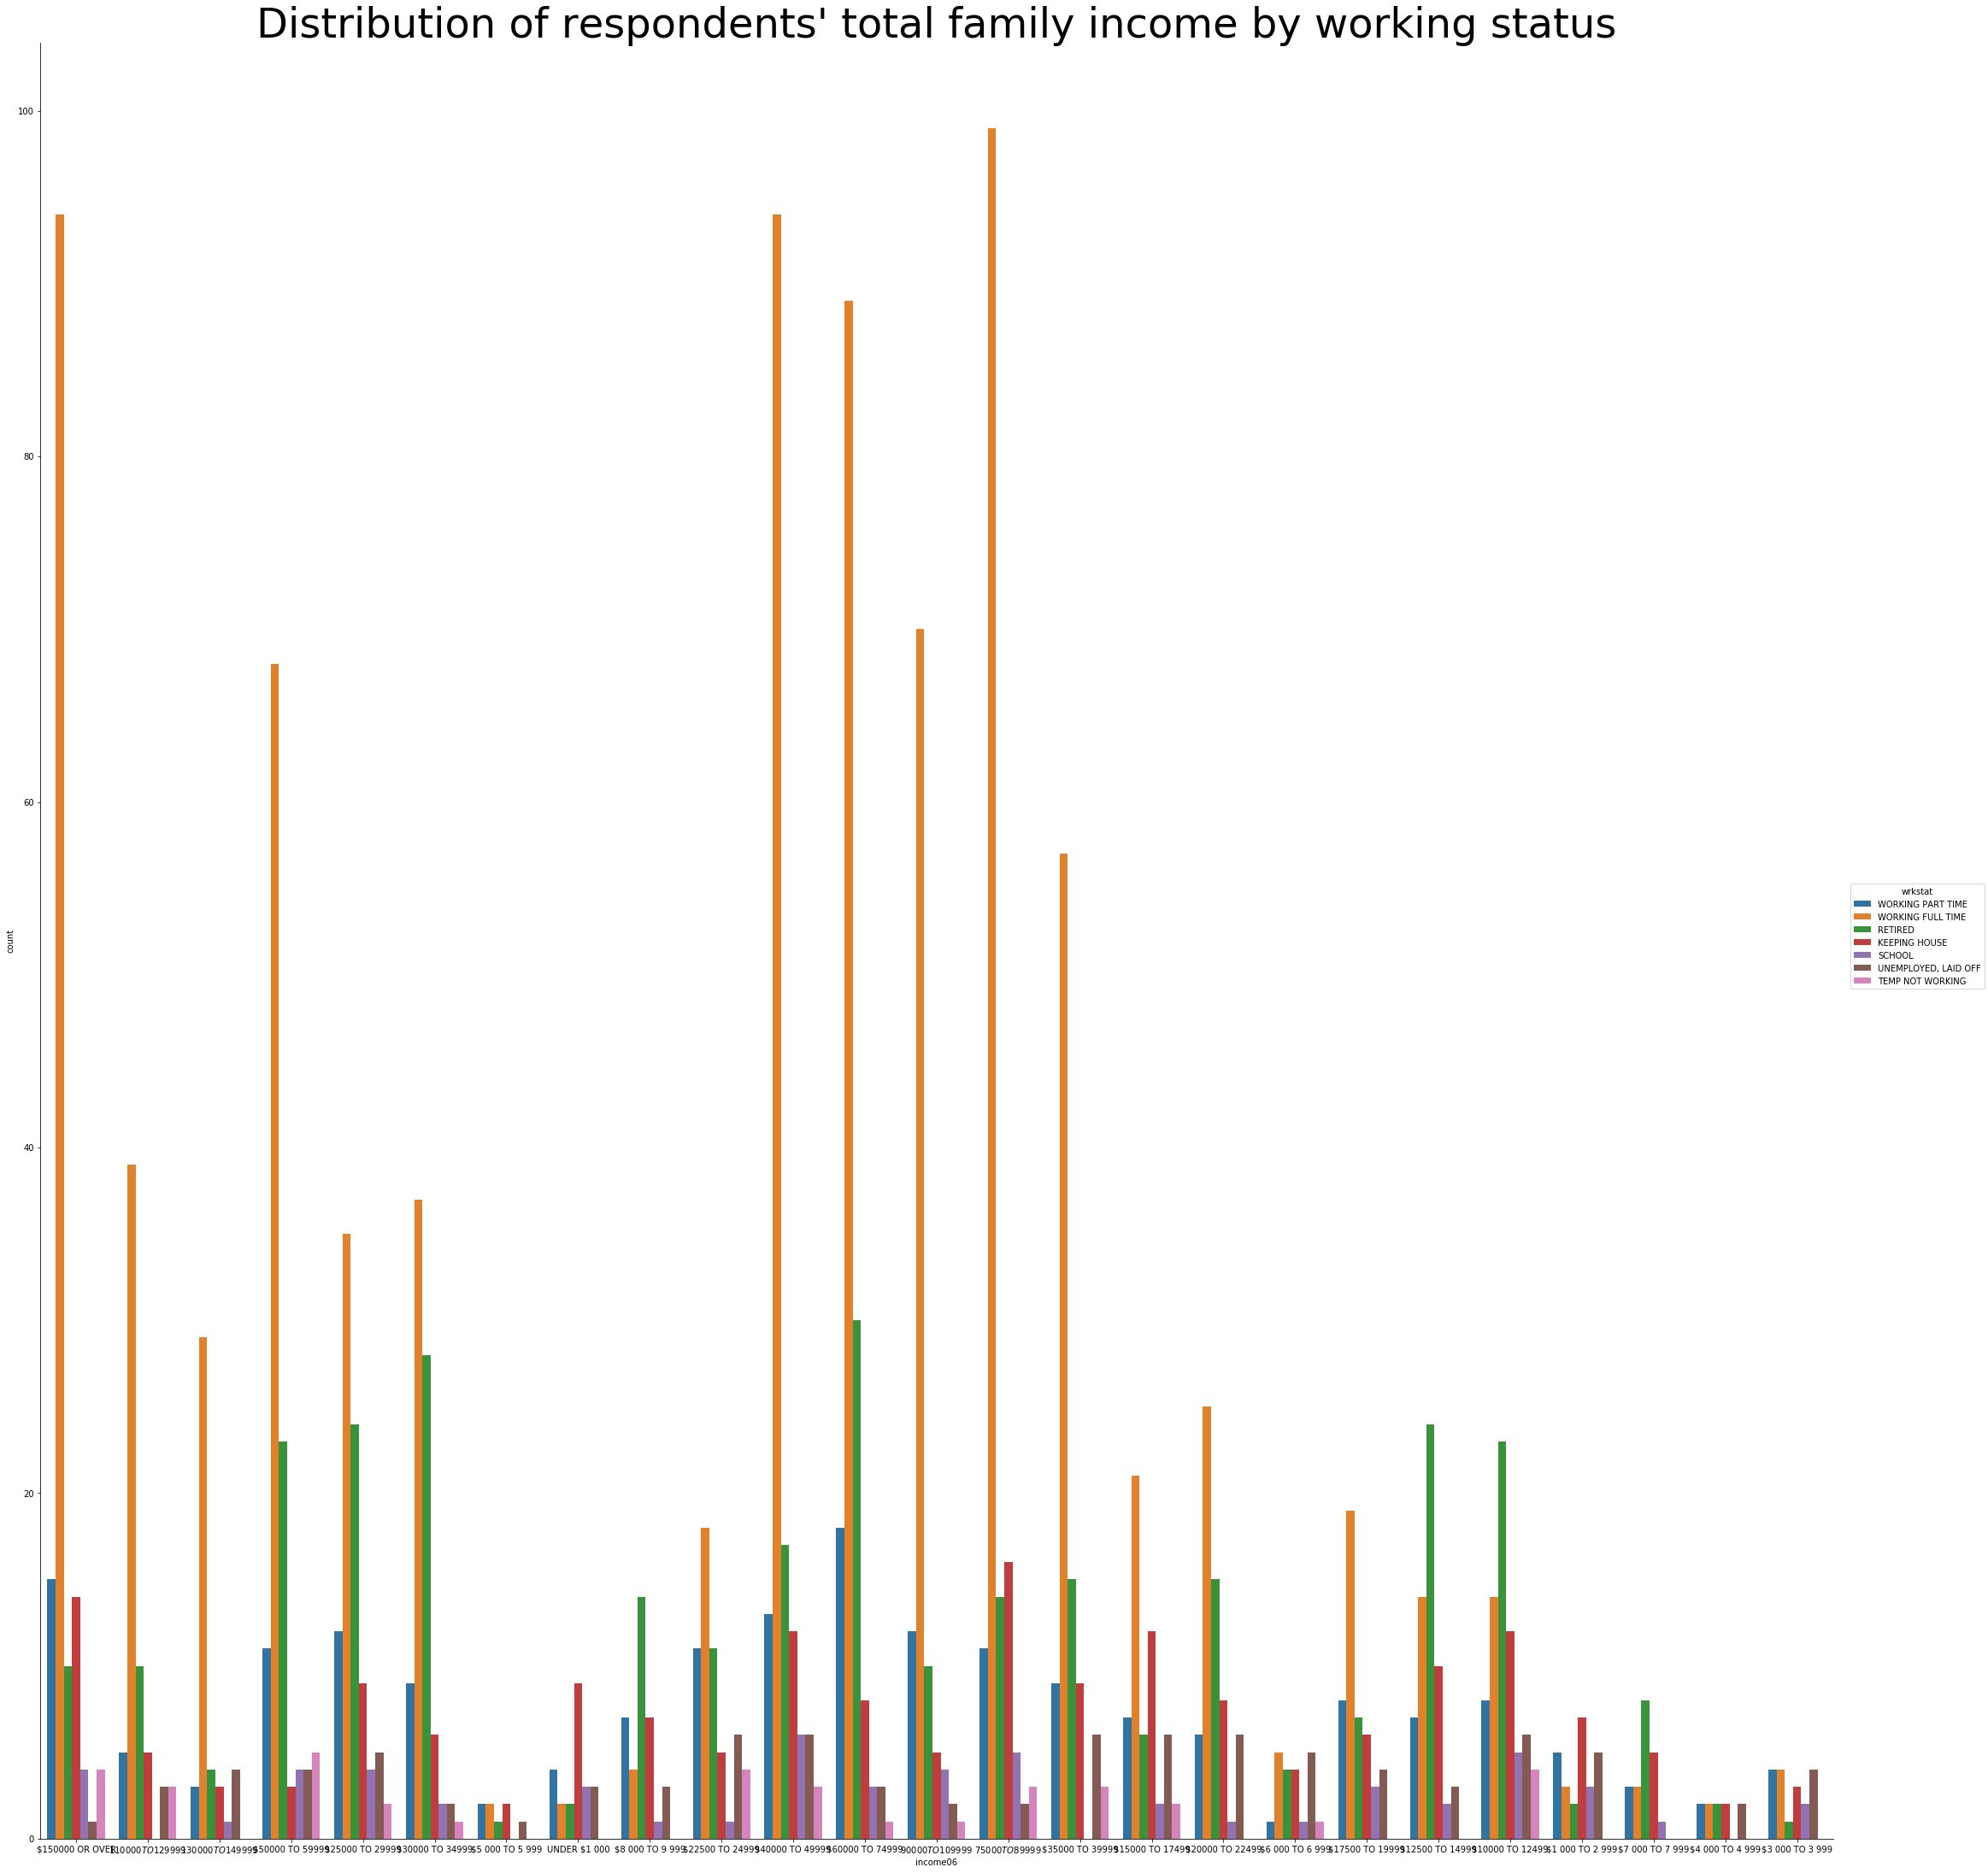

In [3]:
g = sns.factorplot('income06', kind='count', hue = 'wrkstat', data=gss_2012, size=30)
plt.title("Distribution of respondents' total family income by working status", fontsize = 48)
plt.show() 

First, we will analyze the difference in total income among people who have full-time jobs. After plotting the bar charts using the new database only including full-time workers, we find the in general, those people's total family income are over 10,000 dollars. Since the "income06" variable are divided into 25 different categories in this database, it's not convenient for us to analyze the difference among all of those 25 categories, thus, we redefine the categories of this variable and mainly focus on two specific subgroups in this study, which are labeled as high-income group and medium-income group. The high-income group contains people whose total family income is over 90,000 dollars, while the medium-income group contains people whose total family income is between 40,000 and 89,999 dollars. 

In [7]:
filter = gss_2012.wrkstat == 'WORKING FULL TIME'
gss_wrkfulltime = gss_2012[filter]
filter = (gss_wrkfulltime.income06 == "$150000 OR OVER") | (gss_wrkfulltime.income06 == "$130000 TO $149999")| (gss_wrkfulltime.income06 == "$110000 TO $129999")|(gss_wrkfulltime.income06 == "$90000 TO $109999")
gss_highincome = gss_wrkfulltime[filter]
filter = (gss_wrkfulltime.income06 == "$75000 TO $89999") | (gss_wrkfulltime.income06 == "$60000 TO 74999")|(gss_wrkfulltime.income06 == "$50000 TO 59999")|(gss_wrkfulltime.income06 == "$40000 TO 49999")
gss_mediumincome = gss_wrkfulltime[filter]

The main question is how gender and race influence the people's total family income. We could use factor plots to help us figure out the answer to this question. As the graphs shown below, we first set gender as controlled variable and explore the influence of race on people's total family income. As previous discussion about sampling, we know that the ratio of white to black is  74.8% : 15.2% , which is about 20%. However, through the first line of the graphs, which represents the situation in high-income group, we found whatever female or male, the ratio of white to black in each income level is more than 20%, which means white people are more likly to have higher total family income than black people. Meanwhile, the ratio of others to black is  9.9% : 15.2%  in samples, through the graphs, we also find people with other races are more likely to have higher total family income than black people. Then we take a look at the situation in medium group, we can easily find that the amount of Male black people in this group has significantly increased, while the amount of female black people still keeps the same as that in high-income group. Meanwhile the amount of female white people has increased significantly, which means female white people are much more likely to live in a medium total income family than female black people. Another finding is that whatever male and female, people with other races are more likely to be middle class than upper class.

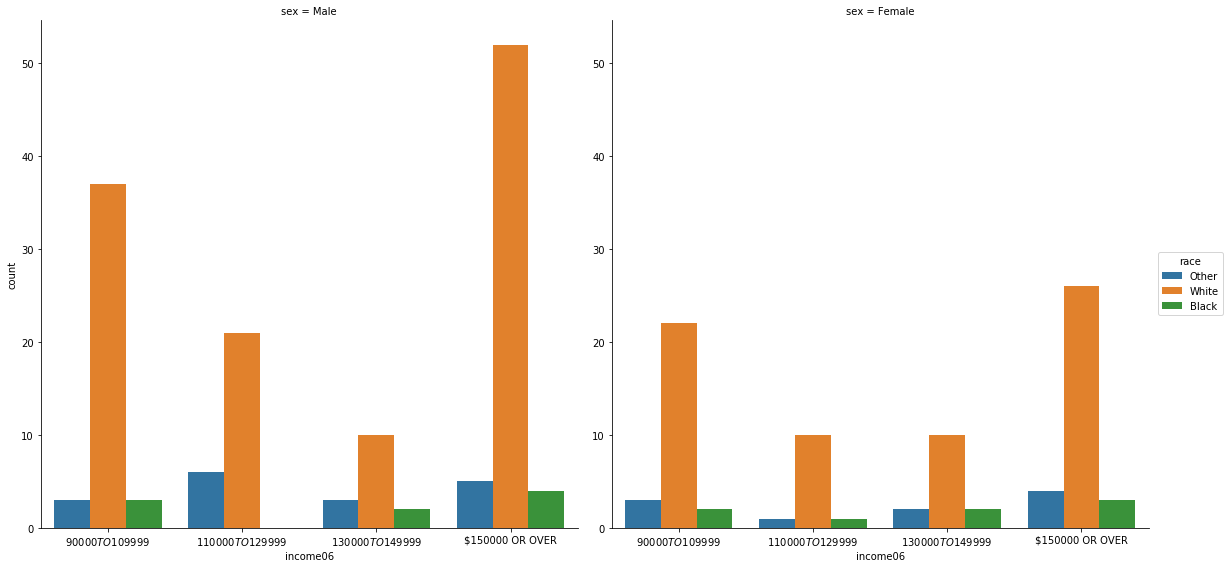

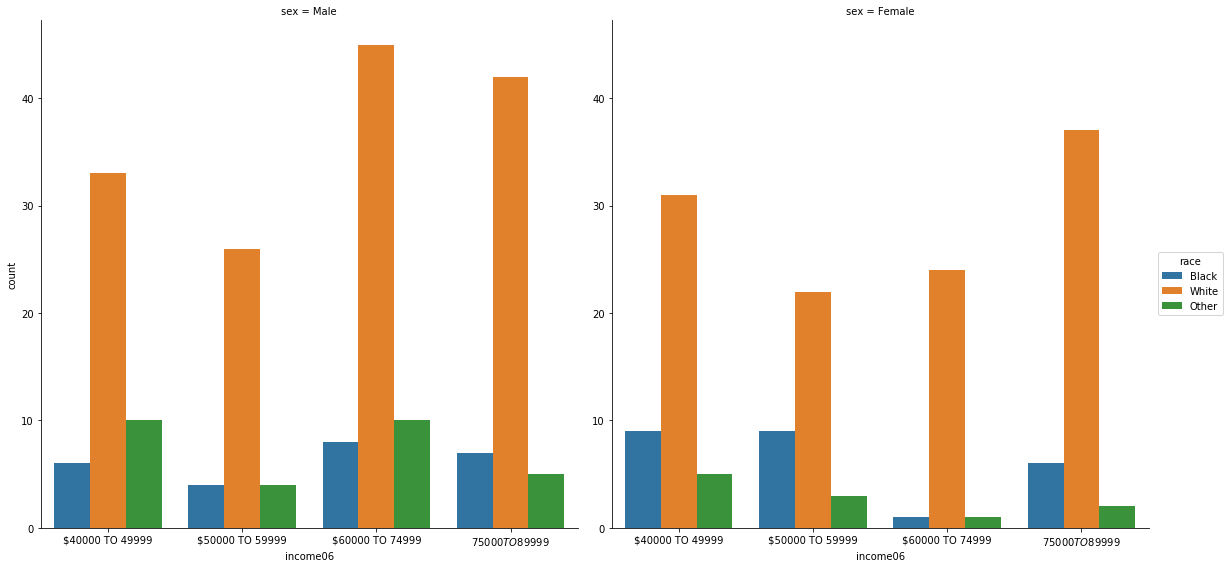

In [12]:
sns.factorplot('income06', kind='count', hue = 'race', col ='sex',col_order = ["Male", "Female"], order = ["$90000 TO $109999","$110000 TO $129999","$130000 TO $149999","$150000 OR OVER"],data=gss_highincome, size = 8)
plt.show() 
sns.factorplot('income06', kind='count', hue = 'race', col ='sex', col_order = ["Male", "Female"],order = ["$40000 TO 49999","$50000 TO 59999","$60000 TO 74999","$75000 TO $89999"],data=gss_mediumincome, size = 8)
plt.show() 

Then we set race as controlled variable, and investigate the influence of gender on people's total family income. The ratio of male to female in our samples is 44.9% : 55.1%, however from the graphs below, we can find in high-income group, whatever people's races, male are more likely to have higher totaly income than female. While in medium-income group, we find for white poeple and people with other races, the situations has changed and it seems that the female shares the same probability of having medium income as the male. But for black people, it seems that the male still has some advantages over the female.

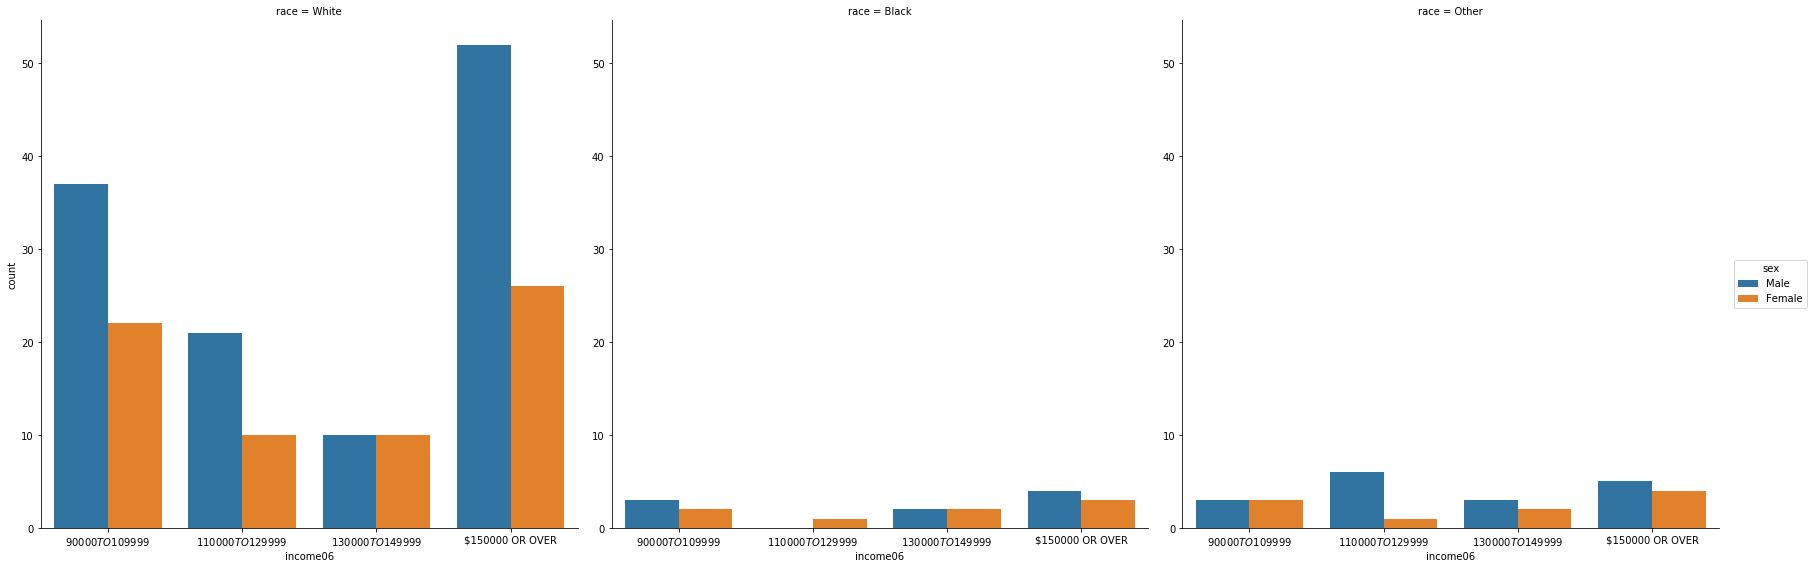

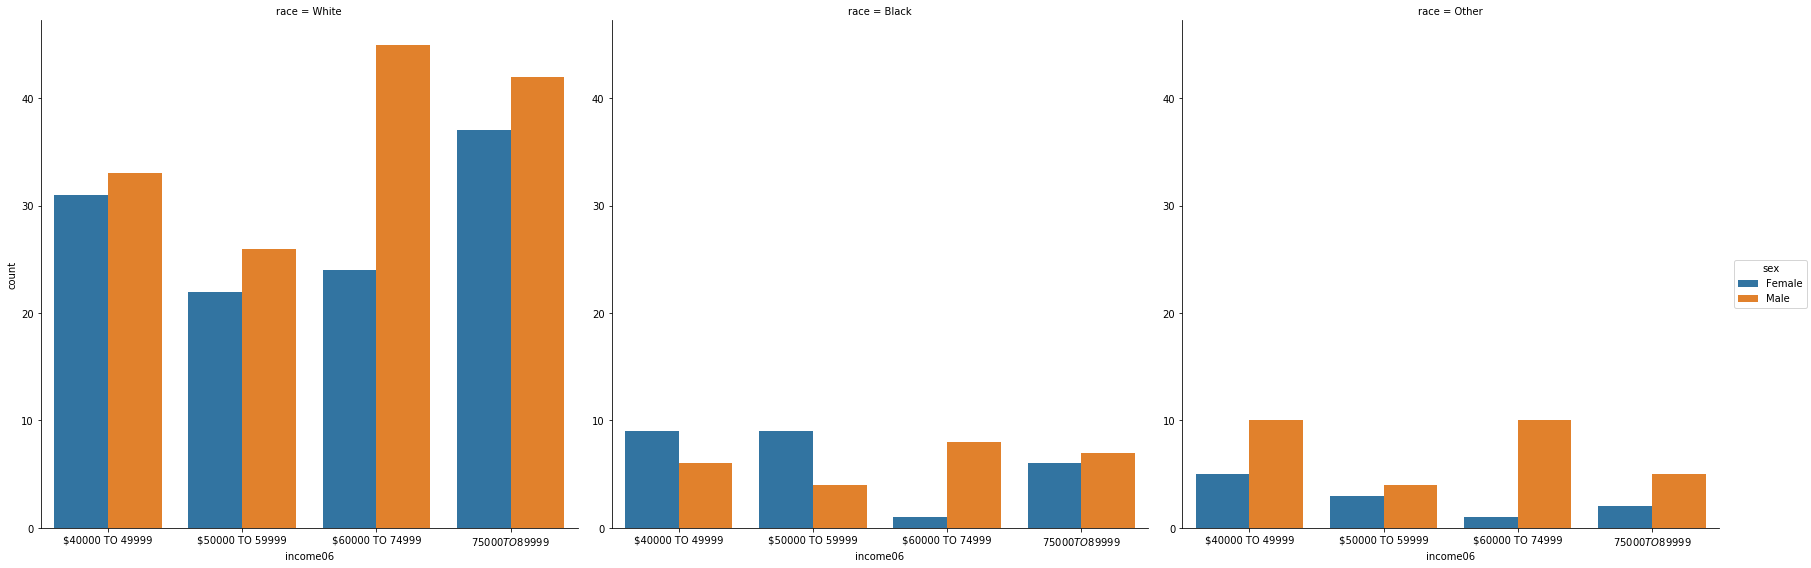

In [15]:
sns.factorplot('income06', kind='count', hue = 'sex', col ='race',col_order = ["White", "Black","Other"], order = ["$90000 TO $109999","$110000 TO $129999","$130000 TO $149999","$150000 OR OVER"],data=gss_highincome, size = 8)
plt.show() 
sns.factorplot('income06', kind='count', hue = 'sex', col ='race', col_order = ["White", "Black","Other"],order = ["$40000 TO 49999","$50000 TO 59999","$60000 TO 74999","$75000 TO $89999"],data=gss_mediumincome, size = 8)
plt.show() 

To put it in a nutshell, through 2012 GSS dataset, there might exist some gender discrimination and race discrimination when considering the total family income that respondent obtain. To be specific, White are more likely to obtain high income than black people, while Males are also more likely to obtain high income than females.

**Explore the relationship between income and people's voting choice**

In this part, we will explore a simple question related with people's behavior, that is their voting choice in 2008 president election, and we want to figure out the relationship between people's total family income and their voting choice. To be specific, we want to investigate the approval rating of two president candidate (Obama and McCain) among people with different levels of total family income. From the graphs below, we can easily among high-income group, McCain obtained more support from white people, while black people and people with other races preferred Obama rather than McCain. However, in medium-income group, the approval rating of Obama is much more higher than McCain whatever people's race.

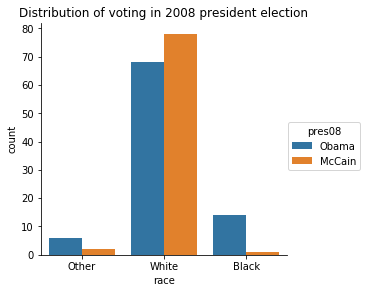

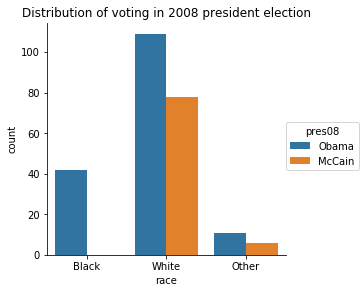

In [38]:
sns.factorplot('race', kind='count', hue = 'pres08', data=gss_highincome)
plt.title("Distribution of voting in 2008 president election")
plt.show()
sns.factorplot('race', kind='count', hue = 'pres08', data=gss_mediumincome)
plt.title("Distribution of voting in 2008 president election")
plt.show()

**The voting choice among people with other working status**

Above is the voting situation of people who have full-time job along with high-income and medium-income, we can also take a look at the voting choice of people with other working status.

In [28]:
filter = gss_2012.wrkstat == 'RETIRED'
gss_retired = gss_2012[filter]
filter = gss_2012.wrkstat == 'WORKING PART TIME'
gss_wrkpt = gss_2012[filter]
filter = (gss_2012.wrkstat != 'WORKING FULL TIME') & (gss_2012.wrkstat != 'WORKING PART TIME') & (gss_2012.wrkstat != 'RETIRED')
gss_others = gss_2012[filter]

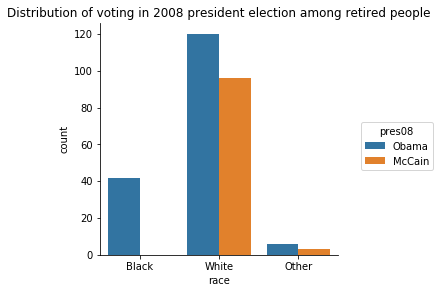

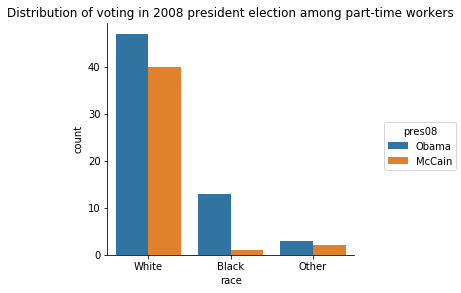

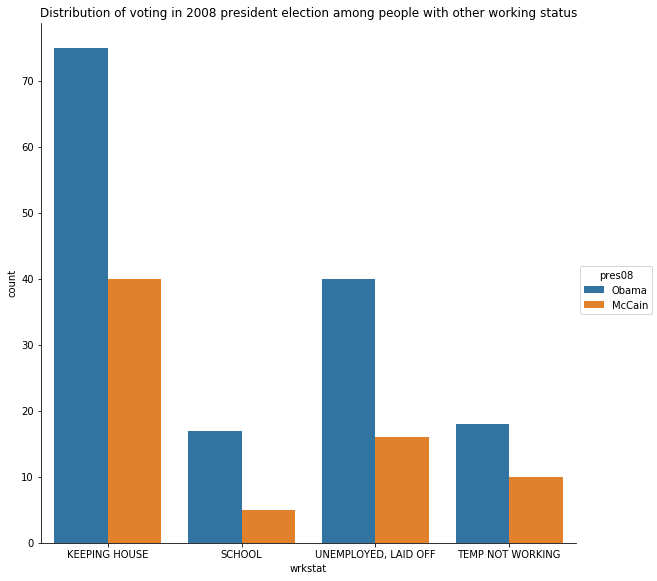

In [39]:
sns.factorplot('race', kind='count', hue = 'pres08', hue_order = ['Obama','McCain'],data=gss_retired)
plt.title("Distribution of voting in 2008 president election among retired people")
plt.show()
sns.factorplot('race', kind='count', hue = 'pres08', hue_order = ['Obama','McCain'], data=gss_wrkpt)
plt.title("Distribution of voting in 2008 president election among part-time workers")
plt.show()
sns.factorplot('wrkstat', kind='count', hue = 'pres08', hue_order = ['Obama','McCain'], data=gss_others, size = 8)
plt.title("Distribution of voting in 2008 president election among people with other working status")
plt.show()

From the bar charts above, we can easily find out Obama obtain more support from all of those people with other working status, and these outcomes are also consistent with the result of 2008 president election.